# Convolutional Neural Networks (CNN)

<img src="https://adeshpande3.github.io/assets/Cover.png" style="width: 800px"/>

### What will happen to an image:

<img src="http://cs231n.github.io/assets/cnn/convnet.jpeg" style="width: 1000px"/>

### Convolution is able to understand the objective in a hierarchy of concepts!

<img src="https://images.anandtech.com/doci/12673/feature_hierarchy_575px.png" style="width: 1000px"/>

### The whole story:

<img src="https://devblogs.nvidia.com/wp-content/uploads/2015/11/fig1.png" style="width: 1000px"/>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


### Load Datset
- Digits dataset in sklearn
- Doc: http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html

In [2]:
data = datasets.load_digits()

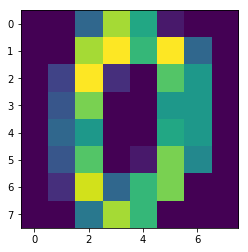

label:  0


In [3]:
plt.imshow(data.images[0])    # show first number in the dataset
plt.show()
print('label: ', data.target[0])    # label = '0'

In [4]:
X_data = data.images
y_data = data.target

In [5]:
# shape of data
print(X_data.shape)    # (8 X 8) format
print(y_data.shape)

(1797, 8, 8)
(1797,)


In [6]:
# reshape X_data into 3-D format
# note that this follows image format of Tensorflow backend
X_data = X_data.reshape((X_data.shape[0], X_data.shape[1], X_data.shape[2], 1))

In [7]:
# one-hot encoding of y_data
y_data = to_categorical(y_data)

In [8]:
# partition data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 777)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1257, 8, 8, 1)
(540, 8, 8, 1)
(1257, 10)
(540, 10)


In [10]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

### 1. Creating model
- Creating a model is same with MLP (Sequential)

In [11]:
model = Sequential()

In [12]:
# convolution layer
model.add(Conv2D(input_shape = (X_data.shape[1], 
                                X_data.shape[2], 
                                X_data.shape[3]), 
                 filters = 10, 
                 kernel_size = (3,3), 
                 strides = (1,1), 
                 padding = 'valid'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size = (2,2)))

# prior layer should be flattend to be connected to dense layers
model.add(Flatten())

# dense layer with 50 neurons
model.add(Dense(50, activation = 'relu'))

# final layer with 10 neurons to classify the instances
model.add(Dense(10, activation = 'softmax'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 6, 6, 10)          100       
_________________________________________________________________
activation_1 (Activation)    (None, 6, 6, 10)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 10)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 90)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                4550      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 5,160
Trainable params: 5,160
Non-trainable params: 0
_________________________________________________________________


### 6. Model compile & train
- Identical to compiling MLP models

In [14]:
adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy',
              optimizer = adam, metrics = ['accuracy'])

In [15]:
history = model.fit(X_train, y_train, 
                    batch_size = 50, 
                    validation_split = 0.2,
                    epochs = 100, verbose = 0)

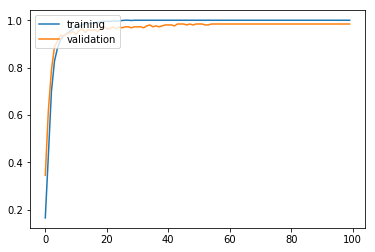

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [16]:
results = model.evaluate(X_test, y_test)

540/540 [==============================] - 0s 35us/step


In [17]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9740740740740741


Even simple CNN model shows fine performance of **97% **test accuracy